In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fastfood-nutrition/fastfood.csv


In [2]:
df=pd.read_csv('/kaggle/input/fastfood-nutrition/fastfood.csv')

In [3]:
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [4]:
df.tail()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other
514,Taco Bell,Fiesta Taco Salad-Steak,720,320,36,8.0,1.0,55,1340,70,8.0,8,28.0,NaN,NaN,NaN,Other


In [5]:
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


In [6]:
df.isnull().any()

restaurant     False
item           False
calories       False
cal_fat        False
total_fat      False
sat_fat        False
trans_fat      False
cholesterol    False
sodium         False
total_carb     False
fiber           True
sugar          False
protein         True
vit_a           True
vit_c           True
calcium         True
salad          False
dtype: bool

In [7]:
df.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [8]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [9]:
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [10]:
df['restaurant'].unique()

array(['Mcdonalds', 'Chick Fil-A', 'Sonic', 'Arbys', 'Burger King',
       'Dairy Queen', 'Subway', 'Taco Bell'], dtype=object)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='calories', ylabel='total_fat'>

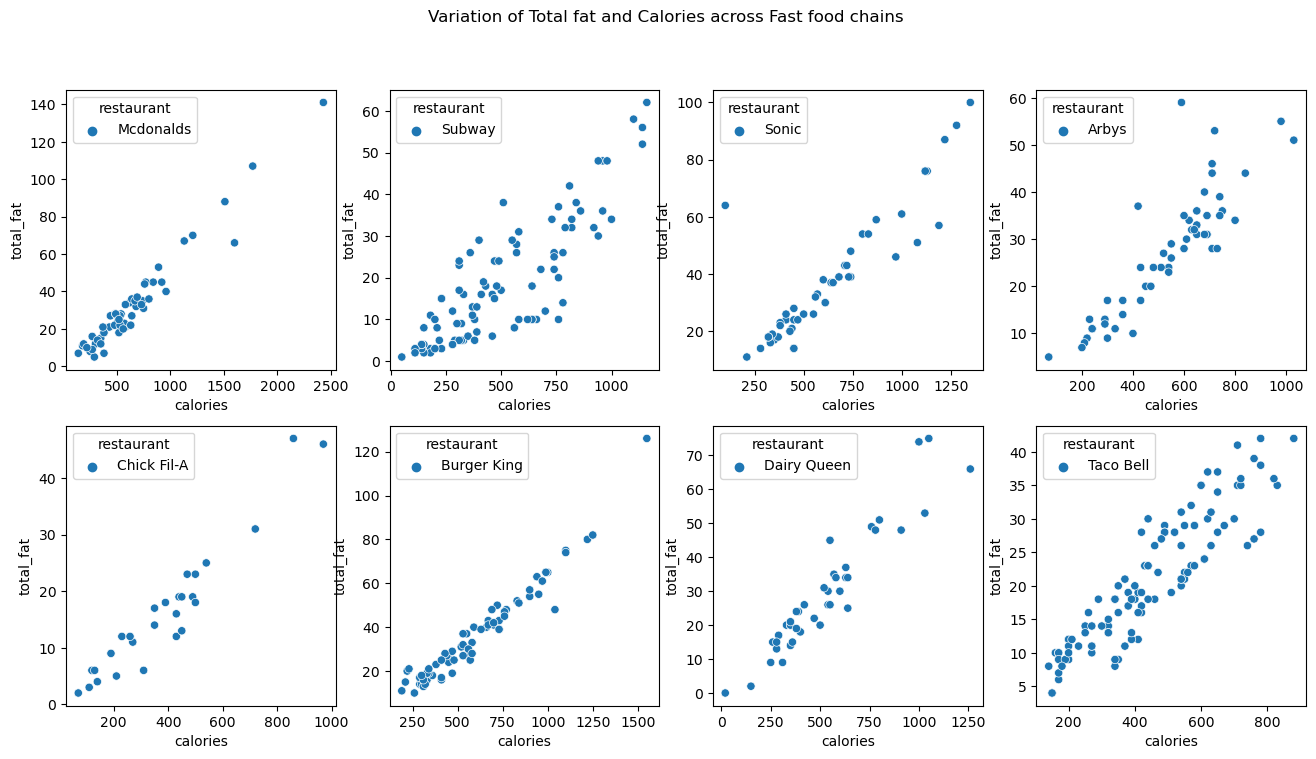

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
 
fig.suptitle('Variation of Total fat and Calories across Fast food chains')
 

sns.scatterplot(ax=axes[0, 0], data=df[df['restaurant']=='Mcdonalds'], y='total_fat', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 1], data=df[df['restaurant']=='Subway'], y='total_fat', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 2], data=df[df['restaurant']=='Sonic'], y='total_fat', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 3], data=df[df['restaurant']=='Arbys'], y='total_fat', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 0], data=df[df['restaurant']=='Chick Fil-A'], y='total_fat', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 1], data=df[df['restaurant']=='Burger King'], y='total_fat', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 2], data=df[df['restaurant']=='Dairy Queen'], y='total_fat', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 3], data=df[df['restaurant']=='Taco Bell'], y='total_fat', x='calories',hue='restaurant')

> # **This shows that the total fat in fast foods**
> # **varies linearly with calories acorss all fast food chains**

<AxesSubplot:xlabel='calories', ylabel='cholesterol'>

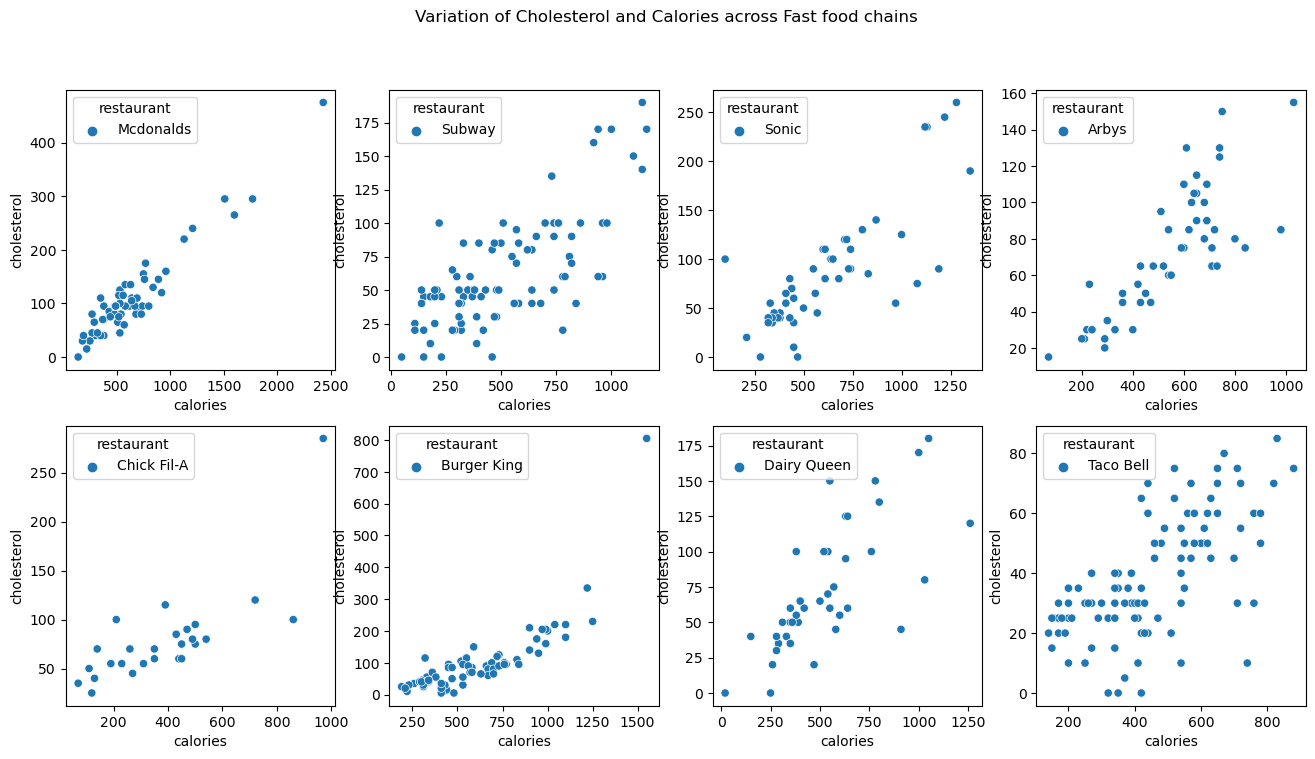

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
 
fig.suptitle('Variation of Cholesterol and Calories across Fast food chains')
 

sns.scatterplot(ax=axes[0, 0], data=df[df['restaurant']=='Mcdonalds'], y='cholesterol', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 1], data=df[df['restaurant']=='Subway'], y='cholesterol', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 2], data=df[df['restaurant']=='Sonic'], y='cholesterol', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 3], data=df[df['restaurant']=='Arbys'], y='cholesterol', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 0], data=df[df['restaurant']=='Chick Fil-A'], y='cholesterol', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 1], data=df[df['restaurant']=='Burger King'], y='cholesterol', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 2], data=df[df['restaurant']=='Dairy Queen'], y='cholesterol', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 3], data=df[df['restaurant']=='Taco Bell'], y='cholesterol', x='calories',hue='restaurant')

> # **It is observed that food items served across**
> # **most of the fast food chains have cholesterol varying**
> # **linearly with calories**

<AxesSubplot:xlabel='calories', ylabel='total_carb'>

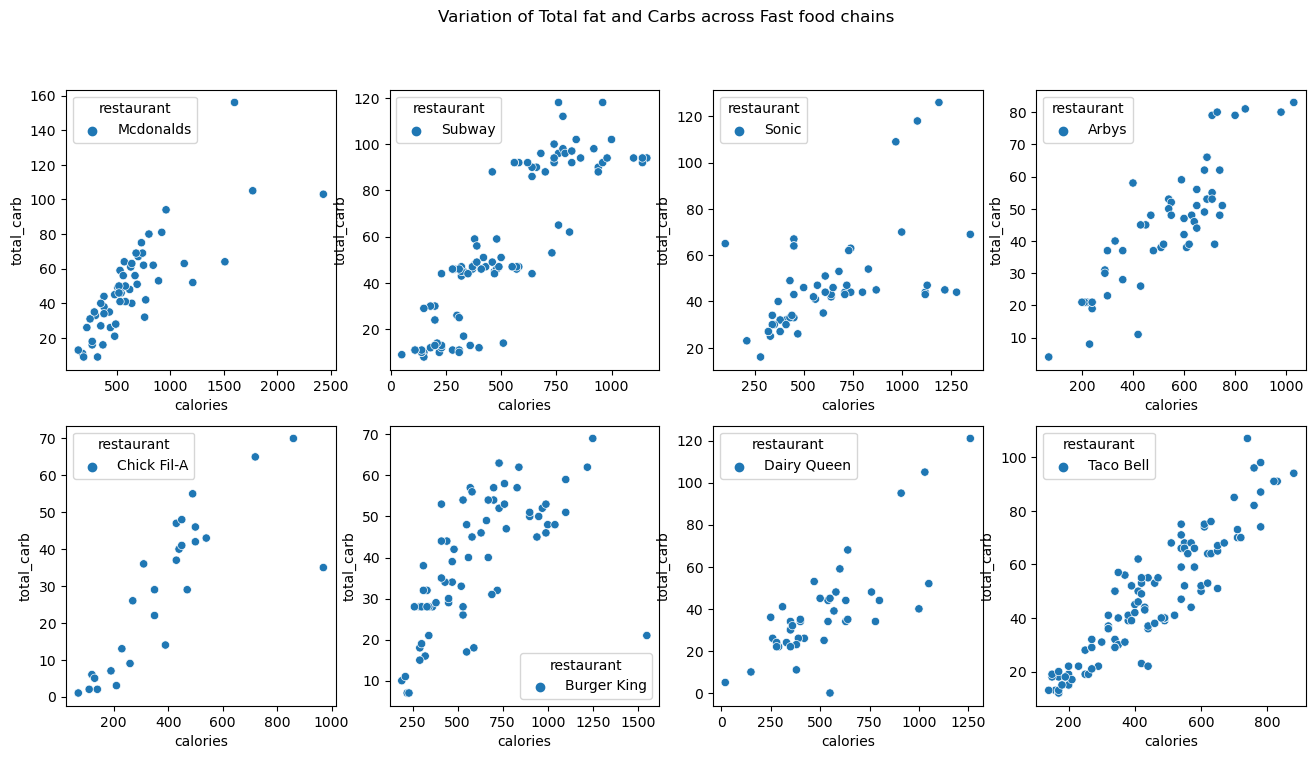

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
 
fig.suptitle('Variation of Total fat and Carbs across Fast food chains')
 

sns.scatterplot(ax=axes[0, 0], data=df[df['restaurant']=='Mcdonalds'], y='total_carb', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 1], data=df[df['restaurant']=='Subway'], y='total_carb', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 2], data=df[df['restaurant']=='Sonic'], y='total_carb', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 3], data=df[df['restaurant']=='Arbys'], y='total_carb', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 0], data=df[df['restaurant']=='Chick Fil-A'], y='total_carb', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 1], data=df[df['restaurant']=='Burger King'], y='total_carb', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 2], data=df[df['restaurant']=='Dairy Queen'], y='total_carb', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 3], data=df[df['restaurant']=='Taco Bell'], y='total_carb', x='calories',hue='restaurant')

> # **It is observed that food items served across**
> # **most of the fast food chains have carbs varying**
> # **linearly with calories**

<AxesSubplot:xlabel='calories', ylabel='sodium'>

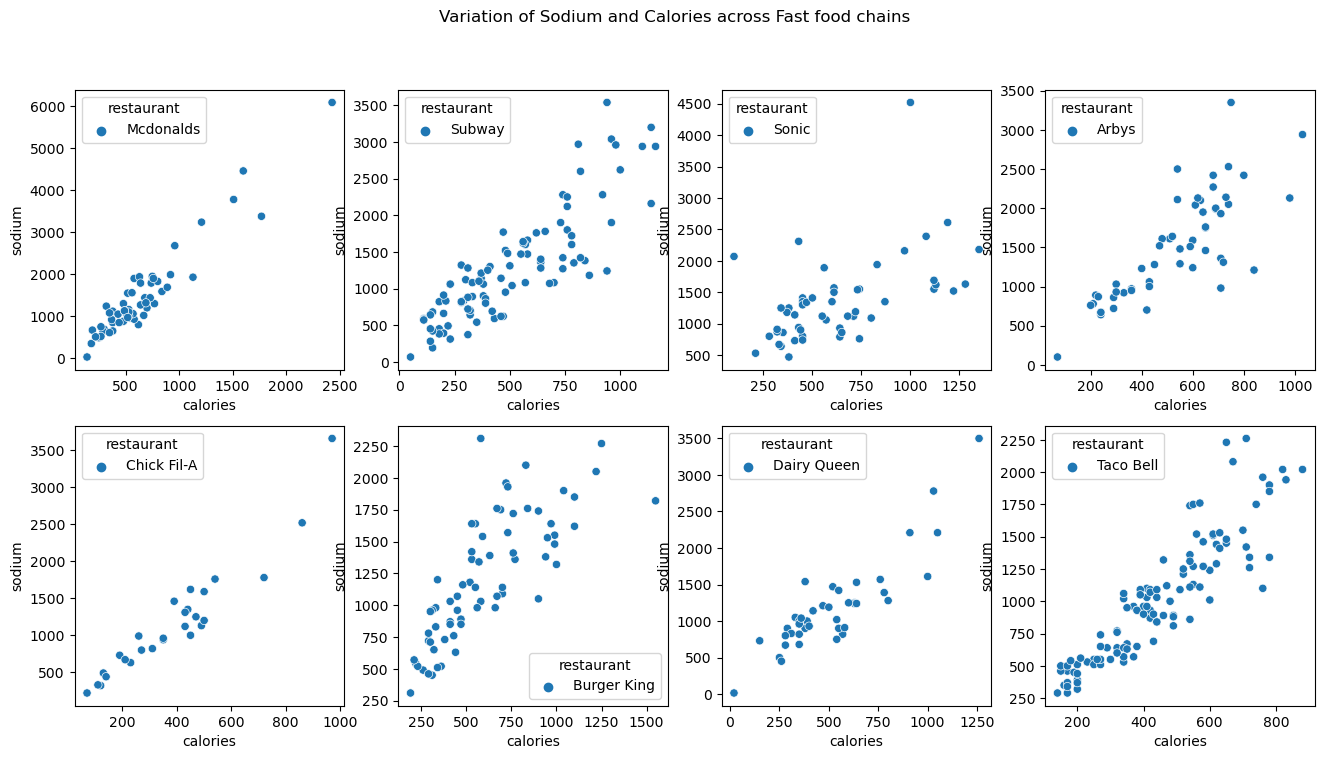

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
 
fig.suptitle('Variation of Sodium and Calories across Fast food chains')
 

sns.scatterplot(ax=axes[0, 0], data=df[df['restaurant']=='Mcdonalds'], y='sodium', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 1], data=df[df['restaurant']=='Subway'], y='sodium', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 2], data=df[df['restaurant']=='Sonic'], y='sodium', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[0, 3], data=df[df['restaurant']=='Arbys'], y='sodium', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 0], data=df[df['restaurant']=='Chick Fil-A'], y='sodium', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 1], data=df[df['restaurant']=='Burger King'], y='sodium', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 2], data=df[df['restaurant']=='Dairy Queen'], y='sodium', x='calories',hue='restaurant')
sns.scatterplot(ax=axes[1, 3], data=df[df['restaurant']=='Taco Bell'], y='sodium', x='calories',hue='restaurant')

> # **It is observed that food items served across**
> # **most of the fast food chains have sodium content**
> # **varying linearly with calories**

In [16]:
df_por=df.loc[df['item'].str.contains("pork", case=False)]
df_bac=df.loc[df['item'].str.contains("bacon", case=False)]
df_ham=df.loc[df['item'].str.contains("ham", case=False)]
df_bacon=pd.concat([df_por,df_bac,df_ham])
df_bris=df.loc[df['item'].str.contains("brisket", case=False)]
df_bee=df.loc[df['item'].str.contains("beef", case=False)]
df_beef=pd.concat([df_bee,df_bris])
df_chicken=df.loc[df['item'].str.contains("chicken", case=False)]

[Text(0.5, 1.0, 'Chicken')]

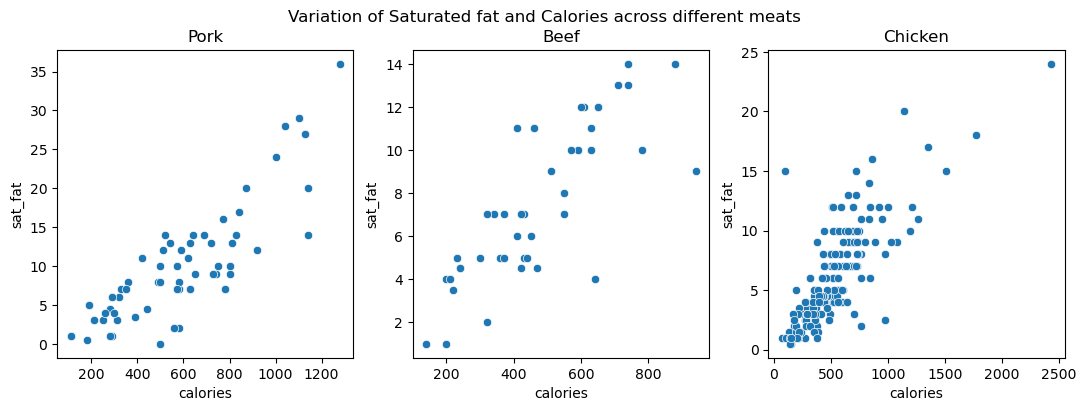

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
 
fig.suptitle('Variation of Saturated fat and Calories across different meats')
 

sns.scatterplot(ax=axes[0],data=df_bacon, y='sat_fat', x='calories').set(title='Pork')
sns.scatterplot(ax=axes[1], data=df_beef, y='sat_fat', x='calories').set(title='Beef')
sns.scatterplot(ax=axes[2],data=df_chicken, y='sat_fat', x='calories').set(title= 'Chicken')


> #  **It can be clearly seen that saturated fat increases linearly across all meats taken into consideration and pork has higher saturated fat with calories**

[Text(0.5, 1.0, 'Chicken')]

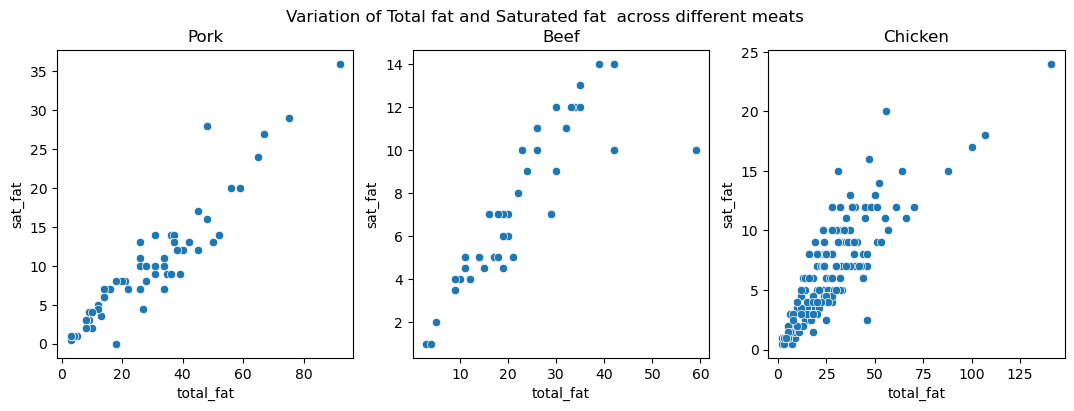

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
 
fig.suptitle('Variation of Total fat and Saturated fat  across different meats')
 

sns.scatterplot(ax=axes[0],data=df_bacon, y='sat_fat', x='total_fat').set(title='Pork')
sns.scatterplot(ax=axes[1], data=df_beef, y='sat_fat', x='total_fat').set(title='Beef')
sns.scatterplot(ax=axes[2],data=df_chicken, y='sat_fat', x='total_fat').set(title= 'Chicken')

> # **Saturated fats increase linearly with total fat across all meats**

[Text(0.5, 1.0, 'Chicken')]

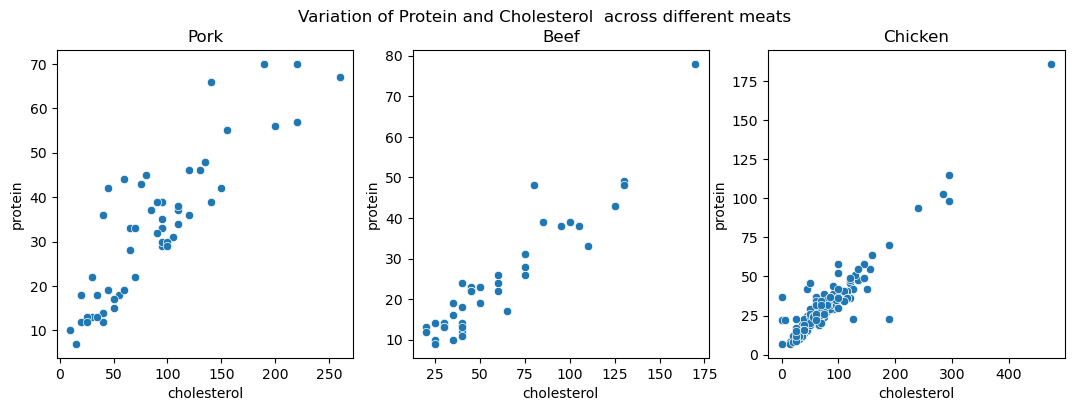

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
 
fig.suptitle('Variation of Protein and Cholesterol  across different meats')
 

sns.scatterplot(ax=axes[0],data=df_bacon, y='protein', x='cholesterol').set(title='Pork')
sns.scatterplot(ax=axes[1], data=df_beef, y='protein', x='cholesterol').set(title='Beef')
sns.scatterplot(ax=axes[2],data=df_chicken, y='protein', x='cholesterol').set(title= 'Chicken')

> # **The protein content of meats vary linearly with cholesterol.**


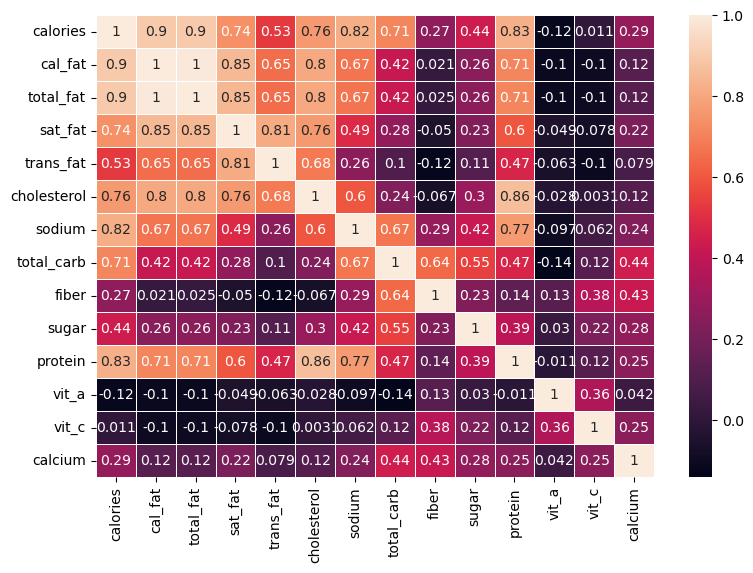

In [20]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),linewidths=0.5,annot=True)
plt.show()

> # **It can be clearly viewed from the correlation plot that protein, calories from fat, total fat, saturated fat, sodium, cholesterol, carbohydrates and protein are positively correlated to calories**

> # **The positive aspect of this plot is that the protein content of these food items are high but the downside is that these food items have high cholesterol, saturated fats, trans fats and sodium levels that come with the high protein content**

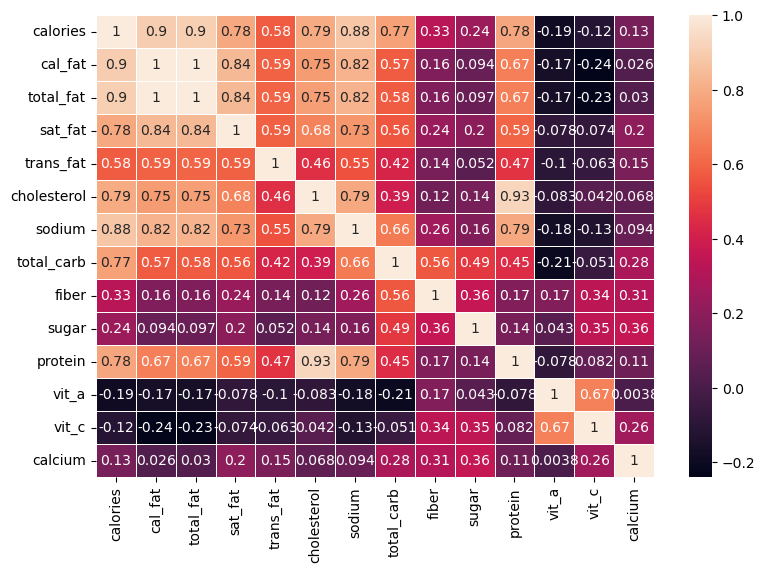

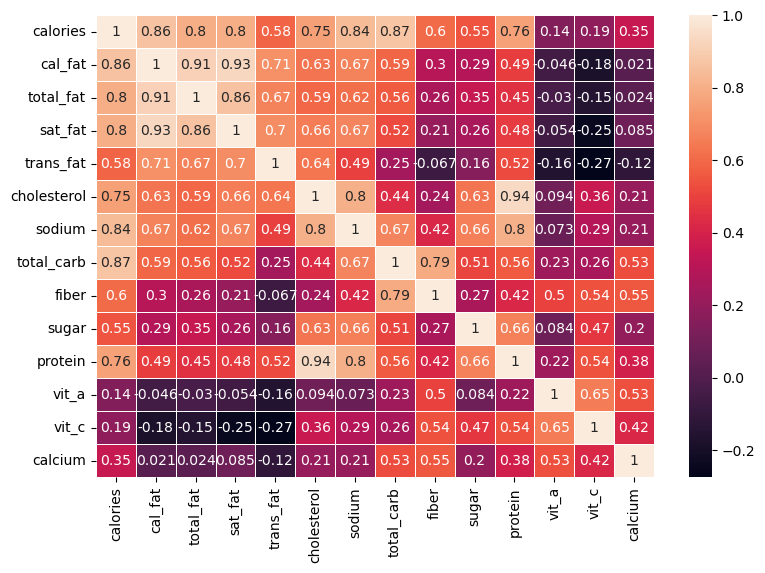

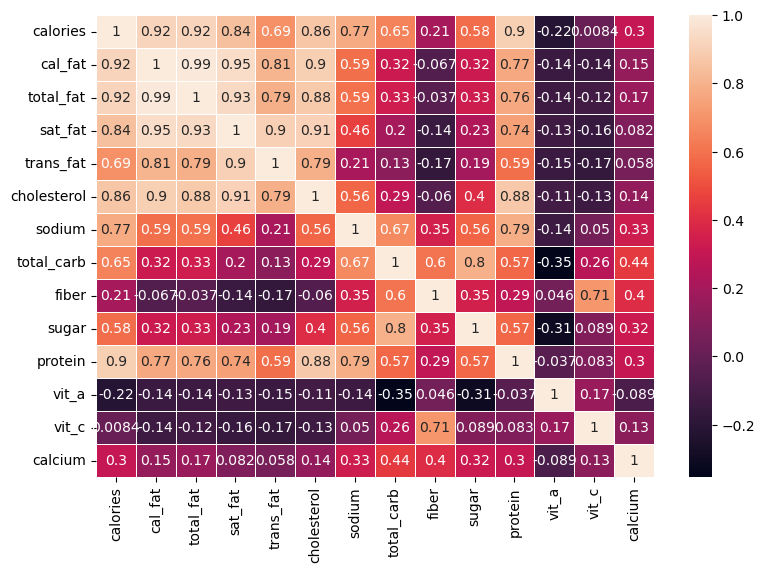

In [21]:
plt.figure(figsize=(9,6))
sns.heatmap(df_chicken.corr(),linewidths=0.5,annot=True)
plt.show()
plt.figure(figsize=(9,6))
sns.heatmap(df_beef.corr(),linewidths=0.5,annot=True)
plt.show()
plt.figure(figsize=(9,6))
sns.heatmap(df_bacon.corr(),linewidths=0.5,annot=True)
plt.show()

# **It can be observed from the correlation plots of the food items with different meats that pork has the highest positive correlation of calories with protein, calories from fat, trans fat, saturated fats and cholesterol**